<a href="https://colab.research.google.com/github/R1ng1/R_lab_1/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Analysis For Auto-MPG Dataset Using R**

In [9]:
install.packages(c('dplyr', 'caret', 'ggplot2', 'corrplot', 'knitr'))


# Load required packages
library(dplyr)
library(caret)
library(ggplot2)
library(corrplot)
library(knitr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

corrplot 0.95 loaded



#**Download the Auto-MPG dataset**

In [2]:
auto_mpg <- read.csv(
  "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  sep = "",
  header = FALSE,
  na.strings = "?"
)

#**Data Preprocessing**

In [5]:
# Assign column names based on the dataset documentation
colnames(auto_mpg) <- c("mpg", "cylinders", "displacement", "horsepower",
                        "weight", "acceleration", "model_year", "origin",
                        "car_name")

In [10]:
# Drop 'car_name' for modeling
auto_mpg <- auto_mpg %>% select(-car_name)

# Convert horsepower to numeric
auto_mpg$horsepower <- as.numeric(auto_mpg$horsepower)

# Remove rows with missing values
auto_mpg <- na.omit(auto_mpg[])

In [11]:
head(auto_mpg)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,18,8,307,130,3504,12.0,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11.0,70,1
4,16,8,304,150,3433,12.0,70,1
5,17,8,302,140,3449,10.5,70,1
6,15,8,429,198,4341,10.0,70,1


In [12]:
summary(auto_mpg)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration     model_year        origin     
 Min.   : 8.00   Min.   :70.00   Min.   :1.000  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000  
 Median :15.50   Median :76.00   Median :1.000  
 Mean   :15.54   Mean   :75.98   Mean   :1.577  
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000  
 Max.   :24.80   Max.   :82.00   Max.   :3.000  

# **Exploratory Data Analysis**

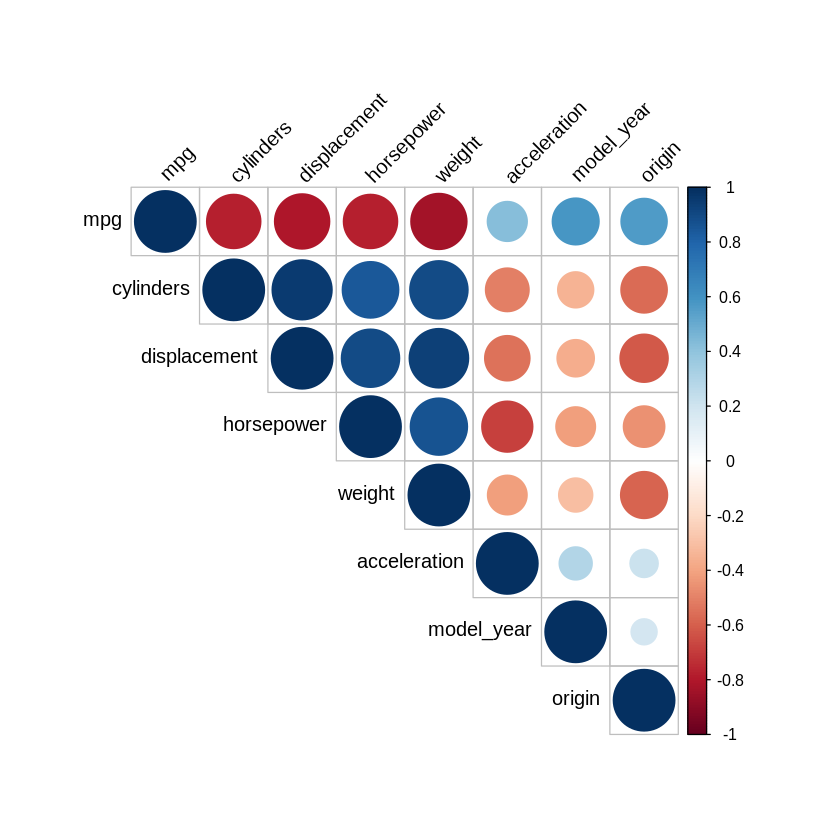

In [13]:
# Check correlations among numeric predictors
cor_data <- cor(auto_mpg[, c("mpg", "cylinders", "displacement",
                             "horsepower", "weight", "acceleration",
                             "model_year", "origin")])

# Plot correlation matrix
corrplot(cor_data, method = "circle", type = "upper", tl.col = "black", tl.srt = 45)

##**From the correlation plot, we can observe:**



mpg tends to have a negative correlation with weight, horsepower, and displacement. mpg tends to have a positive correlation with model_year and acceleration.


#**Train-Test Split**

In [14]:
set.seed(1972)  # For reproducibility

# Create an 80-20 train-test split
train_index <- createDataPartition(auto_mpg$mpg, p = 0.8, list = FALSE)
train_data <- auto_mpg[train_index, ]
test_data  <- auto_mpg[-train_index, ]

# Check the dimensions
cat("Training rows:", nrow(train_data), "Testing rows:", nrow(test_data))

Training rows: 315 Testing rows: 77

# **Build the Multiple Linear Regression Model**

In [16]:
# Fit the model
model <- lm(mpg ~ ., data = train_data)

# Output the summary of the fitted model
# summary(model)

# Extract the summary of the model
model_summary <- summary(model)

In [17]:
# Convert coefficients to a nicely formatted table
kable(model_summary$coefficients,
      caption = "Regression Model Coefficients",
      digits = 4, align = "c")




Table: Regression Model Coefficients

|             | Estimate | Std. Error | t value | Pr(>&#124;t&#124;) |
|:------------|:--------:|:----------:|:-------:|:------------------:|
|(Intercept)  | -18.9882 |   4.9362   | -3.8467 |       0.0001       |
|cylinders    | -0.4735  |   0.3590   | -1.3191 |       0.1881       |
|displacement |  0.0189  |   0.0084   | 2.2338  |       0.0262       |
|horsepower   | -0.0223  |   0.0151   | -1.4796 |       0.1400       |
|weight       | -0.0059  |   0.0007   | -8.6682 |       0.0000       |
|acceleration |  0.1031  |   0.1067   | 0.9667  |       0.3344       |
|model_year   |  0.7514  |   0.0544   | 13.8151 |       0.0000       |
|origin       |  1.6368  |   0.2986   | 5.4818  |       0.0000       |

# **Model Interpretation**

In [26]:
include_graphics("https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/P_value_and_statistical_significance.svg/800px-P_value_and_statistical_significance.svg.png")


[1] "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/P_value_and_statistical_significance.svg/800px-P_value_and_statistical_significance.svg.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


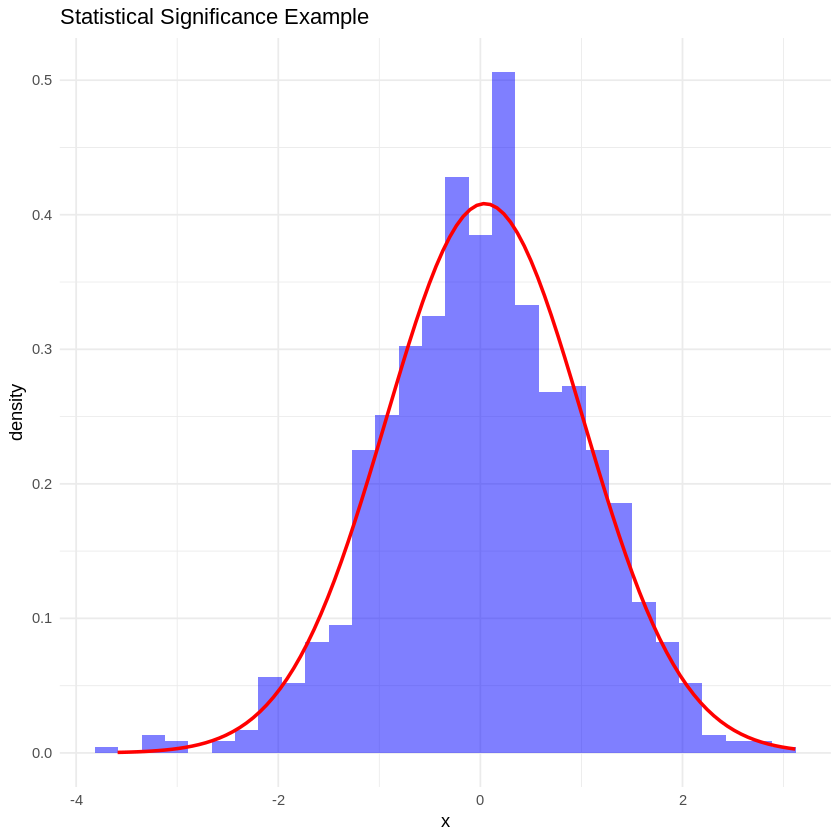

In [27]:
library(ggplot2)

# Simulate data
data <- data.frame(x = rnorm(1000))

# Create histogram with normal curve
ggplot(data, aes(x)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "blue", alpha = 0.5) +
  stat_function(fun = dnorm, args = list(mean = mean(data$x), sd = sd(data$x)), color = "red", size = 1) +
  ggtitle("Statistical Significance Example") +
  theme_minimal()


In [28]:
ggsave("statistical_significance_plot.png")


Saving 7 x 7 in image


In [29]:
include_graphics("statistical_significance_plot.png")


[1] "statistical_significance_plot.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

#**Goodness-of-Fit: R-squared & Adjusted R-squared**

R-squared: The proportion of variance in mpg explained

*  R-squared: The proportion of variance in mpg explained by the model.
*   Adjusted R-squared: Modifies R-squared to account for the number of predictors. (Prevents overestimating performance by simply adding more variables.)




A high R-squared (e.g., 0.82) suggests the model explains 82% of the variation in mpg. An Adjusted R-squared close to R-squared means you’re not artificially inflating R-squared by adding many variables.

# **Model Evaluation**

## Predicting on Test Data and RMSE

In [20]:
# Predict on the test set
predictions <- predict(model, newdata = test_data)

# Calculate RMSE
rmse <- sqrt(mean((test_data$mpg - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse, "\n")

Root Mean Squared Error (RMSE): 3.946512 


## Plot: Actual vs Predicted MPG

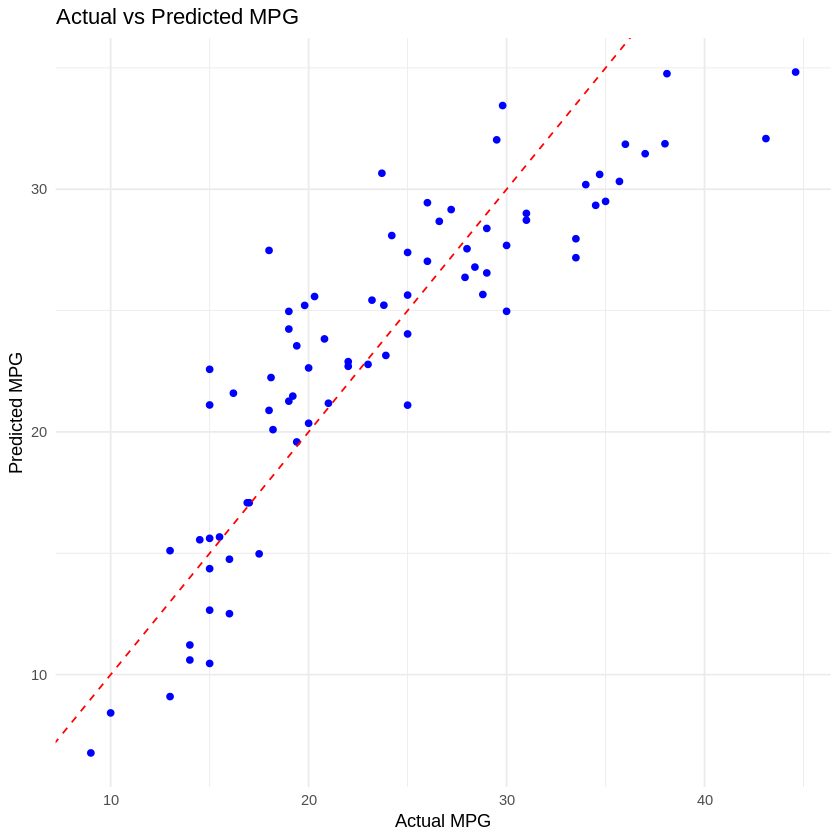

In [22]:
results_df <- data.frame(
  Actual = test_data$mpg,
  Predicted = predictions
)

ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(
    title = "Actual vs Predicted MPG",
    x = "Actual MPG",
    y = "Predicted MPG"
  ) +
  theme_minimal()



*  The closer the points are to the red line, the better the predictions match the actual values.





# **Conclusion**

In this analysis, we:





*  Fit a multiple linear regression model to predict mpg.

*   Observed that our model can explain around 80%+ of the variation in mpg (based on R-squared) and gives a decent RMSE on the test set.
*   By understanding both the magnitude and sign of each coefficient—and whether it is statistically significant—we gain insight into how each aspect of a car impacts its fuel efficiency.



